# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Objective is to create a series of weather related scatters plots demonstrating how the weather of cities across the world varies depending on their distance to the equator. We will use 500+ random cities around the world to note weather associations as they relate to how temperature, humidity, cloudiness and wind speed are affected by a city's latitude. We will use Python libraries (matplotlib/ numpy/ seaborn) to select random cities and the OpenWeatherMap API to display data representatios of weather across cities around the world. We will provide a csv of all data retrieved and png format images for each scatter plot.

API - Application Programming Interface - Inside an API you have a relationship between a client (student) and a server (instructor). A client is an application/device that requests/communicates to API (requests.get(url)) as a parameter to where to request information from via the API. Response could return as 200 (successful) 400 (error). A server is an application/device that supplies information to the client. API calls are like visiting a website and manually search for information. They point to a URL and collect some data, usually in JSON format ([lists] and {dictionaries} [{}] from the page using (json.dumps() method that prints out a string; will need to reformat data using pretty print






). A URL used to communicate with APIs are called endpoints. 



# Python API Homework - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

### Before You Begin

1. Create a new repository for this project called `python-api-challenge`. **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Inside your local git repository, create a directory for both of the  Python Challenges. Use folder names corresponding to the challenges: **WeatherPy**.

4. Inside the folder that you just created, add new files called `WeatherPy.ipynb` and `VacationPy.ipynb`. These will be the main scripts to run for each analysis.

5. Push the above changes to GitHub.

## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.



As final considerations:

* Create a new GitHub repository for this project called `API-Challenge` (note the kebab-case). **Do not add to an existing repo**
* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* For Part I, you must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* For max intensity in the heat map, try setting it to the highest humidity found in the data set.

## Hints and Considerations

* The city data you generate is based on random coordinates as well as different query times; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Once you have computed the linear regression for one chart, the process will be similar for all others. As a bonus, try to create a function that will create these charts based on different parameters.

* Remember that each coordinate will trigger a separate call to the Google API. If you're creating your own criteria to plan your vacation, try to reduce the results in your DataFrame to 10 or fewer cities.

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

### Copyright

Trilogy Education Services © 2019. All Rights Reserved.


In [1]:
# import dependencies, libraries, modules and setup
import matplotlib.pyplot as plt #for scatter plots
import pandas as pd #for df built 
import numpy as np #for random lat/lng coordinates
import requests #to pull data
import time #for current date for plots

# import API key #security - configured file that holds API keys
from api_keys import weather_api_key 

#import 
from scipy.stats import linregress #for linear regression 

# incorporated citipy to determine city based on latitude and longitude
from citipy import citipy #names city closest to lat/lng

# output File (CSV) #where data will be exported to
random_cities_list = "cities.csv"

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# create empty lists to hold randomly generated lat_lngs and corresponding city names
lat_lngs = []
cities = []

In [30]:
# using numpy create a set of random lat and lng combinations nearby cities, sample size of 1500 to meet 500+ city requirement
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [31]:
# create a loop for each coordinate sets
# use citipy to identify nearest city for each lat, lng combination and store city name into empty list created
# create a conditional statement that if a city name is repeated, to skip to next lat/lng set and so on
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
# if city is unique, then append/add it to our city list
    if city not in cities:
        cities.append(city)    

In [32]:
# count the number of rows created in cities list to make sure we have at least 500+ cities
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
# begin with URL for Weather Map API Call using starter base address - API key is stored in api_keys.py file to protect API key. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [34]:
# list of city data
city_data = []

In [35]:
# print log of data retrival results
print("Beginning of Random Cities Retrieval")
print("-----------------------------")

Beginning of Random Cities Retrieval
-----------------------------


In [36]:
# track data for record and coordinate set
record_count = 1
set_count = 1

In [10]:
# loop through all the cities in our list, follow scope formatting and reg expressions
for i, city in enumerate(cities):
        
    # group cities in sets of 50, use modalities % to avoid odd numbers (remainders)
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # create endpoint URL variable for each city , &q
    city_url = url + "&q=" + city
    
    # list the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # add 1 to the record count using + plus or = equal to expressions
    record_count += 1
    
    # run an API request for each of the cities
    try:
        # parse the JSON output and retrieve data for each city
        city_weather = requests.get(city_url).json()

        # parse out the max temp, humidity, and cloudiness for each city
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # attach/ append city information into the city_data list to organize data with values we are investigating
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # if an error is experienced, e.g. 400, skip to next city
    except:
        print("Nearby city not found, go to next city...")
        pass
              
# print message noting loop has completed parsing through city list
print("-----------------------------")
print("Random Cities Retrieval Complete")
print("-----------------------------")      

Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | inuvik
Processing Record 4 of Set 1 | parian dakula
Processing Record 5 of Set 1 | kikwit
Processing Record 6 of Set 1 | belushya guba
Nearby city not found, go to next city...
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | illoqqortoormiut
Nearby city not found, go to next city...
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | pangnirtung
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | khani
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | bonavista
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | praia
Processing Record 22 of Set 1 | albany
Processing Rec

Processing Record 35 of Set 4 | tabasco
Processing Record 36 of Set 4 | husavik
Processing Record 37 of Set 4 | cabatuan
Processing Record 38 of Set 4 | vila velha
Processing Record 39 of Set 4 | mentok
Nearby city not found, go to next city...
Processing Record 40 of Set 4 | sri aman
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | ancud
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | nhulunbuy
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | la cruz
Processing Record 48 of Set 4 | padang
Processing Record 49 of Set 4 | klaksvik
Processing Record 0 of Set 5 | narsaq
Processing Record 1 of Set 5 | kargil
Processing Record 2 of Set 5 | waterloo
Processing Record 3 of Set 5 | almeirim
Processing Record 4 of Set 5 | santa fe
Processing Record 5 of Set 5 | guerrero negro
Processing Record 6 of Set 5 | key west
Processing Record 7 of Set 5 | royan
Processing Record 8 of Set 5 |

Processing Record 19 of Set 8 | talara
Processing Record 20 of Set 8 | jiazi
Processing Record 21 of Set 8 | navrongo
Processing Record 22 of Set 8 | cabo san lucas
Processing Record 23 of Set 8 | thanh hoa
Processing Record 24 of Set 8 | metehara
Nearby city not found, go to next city...
Processing Record 25 of Set 8 | vicente guerrero
Processing Record 26 of Set 8 | ouro preto do oeste
Processing Record 27 of Set 8 | ikeda
Processing Record 28 of Set 8 | torbay
Processing Record 29 of Set 8 | auki
Processing Record 30 of Set 8 | leningradskiy
Processing Record 31 of Set 8 | dom pedrito
Processing Record 32 of Set 8 | upala
Processing Record 33 of Set 8 | mana
Processing Record 34 of Set 8 | cidreira
Processing Record 35 of Set 8 | mahajanga
Processing Record 36 of Set 8 | coro
Processing Record 37 of Set 8 | nioro
Processing Record 38 of Set 8 | tidore
Nearby city not found, go to next city...
Processing Record 39 of Set 8 | bengkulu
Processing Record 40 of Set 8 | humaita
Processing

Processing Record 4 of Set 12 | ballina
Processing Record 5 of Set 12 | macau
Processing Record 6 of Set 12 | tumannyy
Nearby city not found, go to next city...
Processing Record 7 of Set 12 | phonhong
Processing Record 8 of Set 12 | balestrand
Processing Record 9 of Set 12 | valparaiso
Processing Record 10 of Set 12 | mehamn
Processing Record 11 of Set 12 | kieta
Processing Record 12 of Set 12 | tavricheskoye
Processing Record 13 of Set 12 | morehead
Processing Record 14 of Set 12 | teguldet
Processing Record 15 of Set 12 | virginia beach
Processing Record 16 of Set 12 | znamenskoye
Processing Record 17 of Set 12 | brownwood
Processing Record 18 of Set 12 | san andres
Processing Record 19 of Set 12 | coahuayana
Processing Record 20 of Set 12 | marrakesh
Processing Record 21 of Set 12 | charters towers
Processing Record 22 of Set 12 | chiredzi
Processing Record 23 of Set 12 | pavilosta
Processing Record 24 of Set 12 | ruston
Processing Record 25 of Set 12 | jawhar
Processing Record 26 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# organize Random Cities Retrieval Complete results (array of JSON) into a Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.61,-37.64,37.40,93,2,6.93,GL,1594100628
1,busselton,-33.65,115.33,60.01,73,99,4.00,AU,1594100628
2,inuvik,68.35,-133.72,48.20,76,20,10.29,CA,1594100628
3,parian dakula,5.56,120.77,83.37,69,97,4.94,PH,1594100628
4,kikwit,-5.04,18.82,72.57,42,32,1.90,CD,1594100628


In [12]:
# extract required fields we want to plot from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# export the city_data pandas df into a csv file, to use in vacationpy
city_data_pd.to_csv(random_cities_list, index_label="City_ID")

# count the number of cities
city_data_pd.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

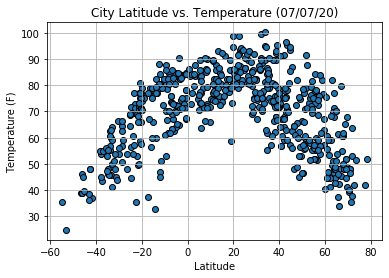

In [13]:
# series of scatter plot for latitude vs. temperature using parameters
plt.scatter(lats, 
            max_temps,
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            label="Cities")

# include other graph labeling informationa and timestamp
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# save plots in png format
plt.savefig("Figure1_Lat_Temp.png")

# show plot
plt.show()

Scatter Plot notes that latitudes 0 to 40 have the highest temperatures. 

#### Latitude vs. Humidity Plot

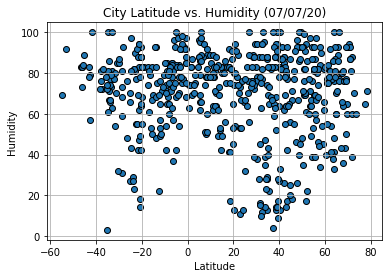

In [14]:
# series of scatter plot for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            label="Cities")

# include other graph labeling informationa and timestamp
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()

# save plots in png format
plt.savefig("Figure2_Lat_Hum.png")

# show plot
plt.show()

Scatter Plot notes humidity is not centralized in the globe.

#### Latitude vs. Cloudiness Plot

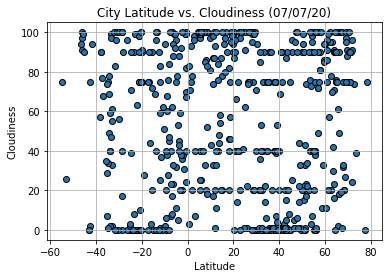

In [15]:
# series of scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            label="Cities")

# include other graph labeling informationa and timestamp
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()

# save plot in png format
plt.savefig("Figure3_Lat_Cloud.png")

# show plot
plt.show()

Scatter Plot notes cloudiness is experience in all latitudes of the globe.

#### Latitude vs. Wind Speed Plot

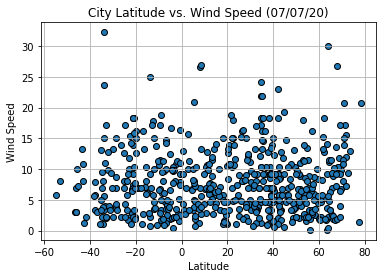

In [16]:
# series of scatter plot for latitude vs. wind speed 
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            label="Cities")

# include other graph labeling informationa and timestamp
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid()

# save plot in png format
plt.savefig("Figure4_Lat_Wind.png")

# show plot
plt.show()

Scatter Plot notes wind speed is mild around the globe. 

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
#code to find the linear regression
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [19]:
# create Northern Hemisphere DataFrames
NH=city_data_pd.loc[city_data_pd["Lat"]>0,:]
NH.reset_index(drop=True,inplace=True)
NH.rename_axis('City_ID',inplace=True)
NH

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.61,-37.64,37.40,93,2,6.93,GL,1594100628
1,inuvik,68.35,-133.72,48.20,76,20,10.29,CA,1594100628
2,parian dakula,5.56,120.77,83.37,69,97,4.94,PH,1594100628
3,kapaa,22.08,-159.32,78.80,74,40,10.29,US,1594100628
4,severo-kurilsk,50.68,156.12,55.49,82,15,4.81,RU,1594100628
...,...,...,...,...,...,...,...,...,...
380,jishui,33.73,115.40,100.24,35,22,6.96,CN,1594100658
381,tateyama,34.98,139.87,82.40,83,75,21.92,JP,1594100477
382,shiroishi,38.00,140.62,80.01,88,75,3.36,JP,1594100658


In [20]:
# create Southern Hemisphere DataFrames
SH=city_data_pd.loc[city_data_pd["Lat"]<0,:]
SH.reset_index(drop=True,inplace=True)
SH.rename_axis('City_ID',inplace=True)
SH

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.65,115.33,60.01,73,99,4.00,AU,1594100628
1,kikwit,-5.04,18.82,72.57,42,32,1.90,CD,1594100628
2,bluff,-46.60,168.33,39.00,83,94,3.00,NZ,1594100628
3,bredasdorp,-34.53,20.04,55.40,71,49,8.05,ZA,1594100628
4,avarua,-21.21,-159.78,71.60,83,98,13.87,CK,1594100628
...,...,...,...,...,...,...,...,...,...
177,saint-pierre,-21.34,55.48,73.40,94,90,18.34,RE,1594100658
178,conceicao do araguaia,-8.26,-49.26,70.36,60,0,1.83,BR,1594100658
179,chipinge,-20.19,32.62,57.40,42,0,1.92,ZW,1594100658


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

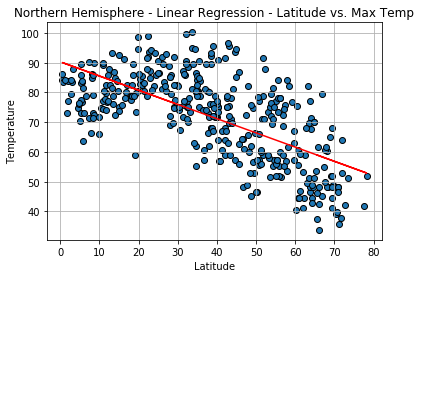

In [21]:
x_axis = NH["Lat"]
y_axis = NH["Max Temp"]

#find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot and linear regression
plt.scatter(x_axis,y_axis,edgecolors="black")
plt.plot(x_axis,regress_values,"r-")

#labeling scatter plot
plt.title("Northern Hemisphere - Linear Regression - Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

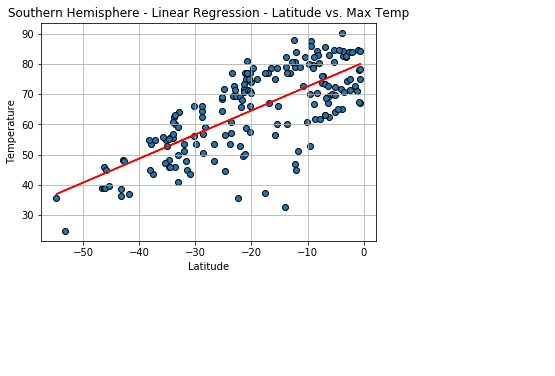

In [22]:
x_axis = SH["Lat"]
y_axis = SH["Max Temp"]

#find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot and linear regression
plt.scatter(x_axis,y_axis,edgecolors="black")
plt.plot(x_axis,regress_values,"r-")

#labeling scatter plot
plt.title("Southern Hemisphere - Linear Regression - Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

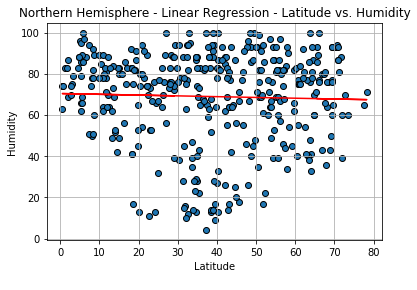

In [23]:
x_axis = NH["Lat"]
y_axis = NH["Humidity"]

#find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot and linear regression
plt.scatter(x_axis,y_axis,edgecolors="black")
plt.plot(x_axis,regress_values,"r-")

#labeling scatter plot
plt.title("Northern Hemisphere - Linear Regression - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

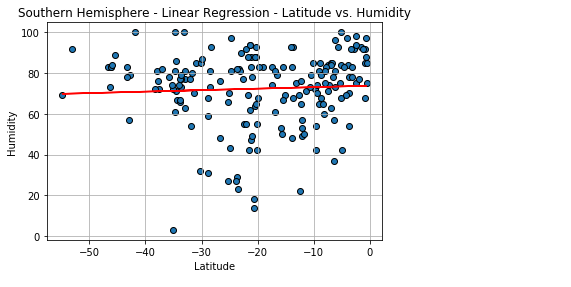

In [24]:
x_axis = SH["Lat"]
y_axis = SH["Humidity"]

#find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot and linear regression
plt.scatter(x_axis,y_axis,edgecolors="black")
plt.plot(x_axis,regress_values,"r-")

#labeling scatter plot
plt.title("Southern Hemisphere - Linear Regression - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

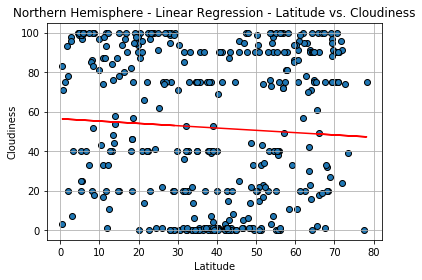

In [25]:
x_axis = NH["Lat"]
y_axis = NH["Cloudiness"]

#find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot and linear regression
plt.scatter(x_axis,y_axis,edgecolors="black")
plt.plot(x_axis,regress_values,"r-")

#labeling scatter plot
plt.title("Northern Hemisphere - Linear Regression - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

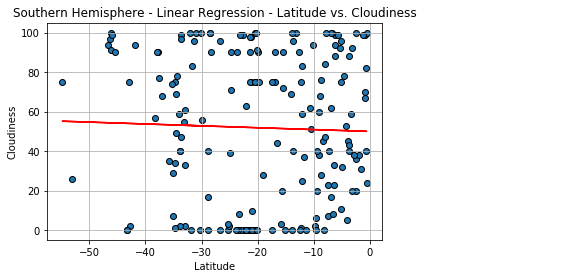

In [26]:
x_axis = SH["Lat"]
y_axis = SH["Cloudiness"]

#find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot and linear regression
plt.scatter(x_axis,y_axis,edgecolors="black")
plt.plot(x_axis,regress_values,"r-")

#labeling scatter plot
plt.title("Southern Hemisphere - Linear Regression - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

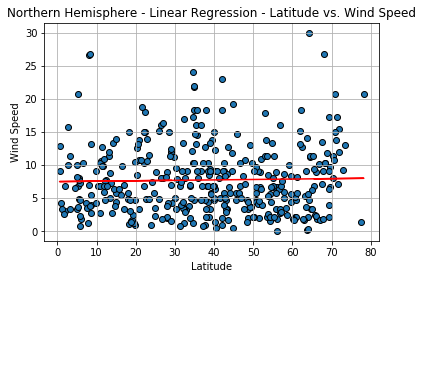

In [27]:
x_axis = NH["Lat"]
y_axis = NH["Wind Speed"]

#find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot and linear regression
plt.scatter(x_axis,y_axis,edgecolors="black")
plt.plot(x_axis,regress_values,"r-")

#labeling scatter plot
plt.title("Northern Hemisphere - Linear Regression - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

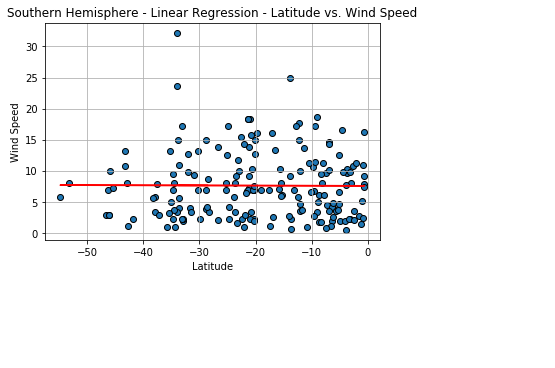

In [28]:
x_axis = SH["Lat"]
y_axis = SH["Wind Speed"]

#find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot and linear regression
plt.scatter(x_axis,y_axis,edgecolors="black")
plt.plot(x_axis,regress_values,"r-")

#labeling scatter plot
plt.title("Southern Hemisphere - Linear Regression - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.show()